In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

| Feature                  | Explanation                                               | Measurement      | Range               |
|--------------------------|-----------------------------------------------------------|------------------|---------------------|
| Age                      | Age of the patient                                        | Years            | [40,..., 95]        |
| Anaemia                  | Decrease of red blood cells or hemoglobin                 | Boolean          | 0, 1                |
| Creatinine phosphokinase | Level of the CPK enzyme in the blood                      | mcg/L            | [23,..., 7861]      |
| Diabetes                 | If the patient has diabetes                               | Boolean          | 0, 1                |
| Ejection fraction        | Percentage of blood leaving the heart at each contraction | Percentage       | [14,..., 80]        |
| High blood pressure      | If a patient has hypertension                             | Boolean          | 0, 1                |
| Platelets                | Platelets in the blood                                    | kiloplatelets/mL | [25.01,..., 850.00] |
| Serum creatinine         | Level of creatinine in the blood                          | mg/dL            | [0.50,..., 9.40]    |
| Serum sodium             | Level of sodium in the blood                              | mEq/L            | [114,..., 148]      |
| Sex                      | Woman or man                                              | Binary           | 0, 1                |
| Smoking                  | If the patient smokes                                     | Boolean          | 0, 1                |
| Time                     | Follow-up period                                          | Days             | [4,...,285]         |
| Death event (target)     | If the patient died during the follow-up period           | Boolean          | 0, 1                |

In [2]:
DATA_PATH = "Dados/heart_failure_clinical_records_dataset.csv"
heart_df = pd.read_csv(DATA_PATH)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_df.shape

(299, 13)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [22]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
heart_df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Não morreram: 67.89% dos casos
Morreram: 32.11% dos casos
Proporção: 2.11


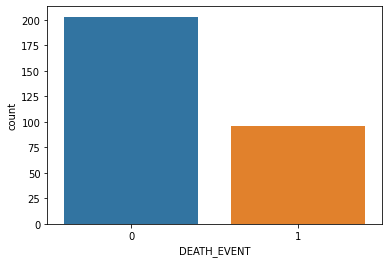

In [21]:
sns.countplot(data=heart_df, x='DEATH_EVENT')
valores = heart_df.DEATH_EVENT.value_counts().values
print('Não morreram: {:.2f}% dos casos'.format(valores[0]/(valores[1]+valores[0])*100))
print('Morreram: {:.2f}% dos casos'.format(valores[1]/(valores[1]+valores[0])*100))
print('Proporção: {:.2f}'.format(valores[0]/valores[1]))

<AxesSubplot:>

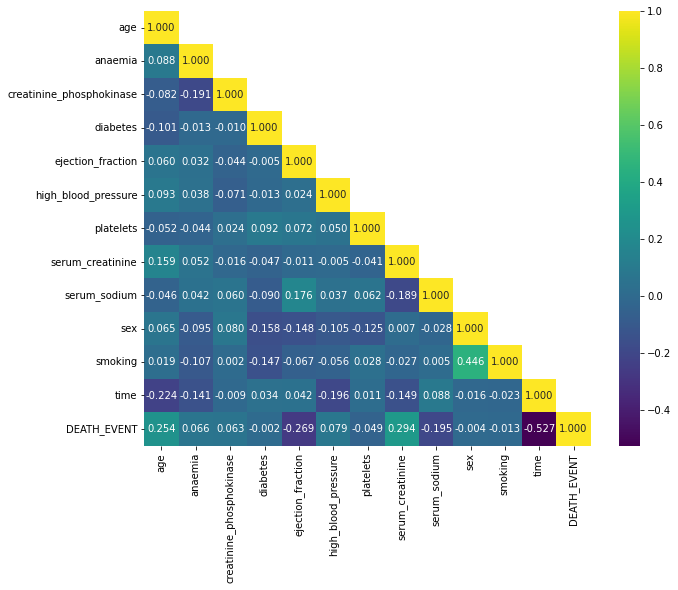

In [39]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones(heart_df.corr().shape[0]))
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if i==j:
            mask[i,j] = 0
        else:
            continue
sns.heatmap(heart_df.corr(), annot=True, cmap='viridis', fmt='.3f', mask=mask)

In [10]:
heart_df.groupby(['DEATH_EVENT']).mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [11]:
heart_df[heart_df['DEATH_EVENT'] == 1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


In [5]:
# Observando a variância das features contínuas
a = heart_df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']].var()
make_float = lambda x: "{:.2f}".format(x)
a.apply(make_float)

age                                141.49
creatinine_phosphokinase        941458.57
ejection_fraction                  140.06
platelets                   9565668749.45
serum_creatinine                     1.07
serum_sodium                        19.47
time                              6023.97
dtype: object

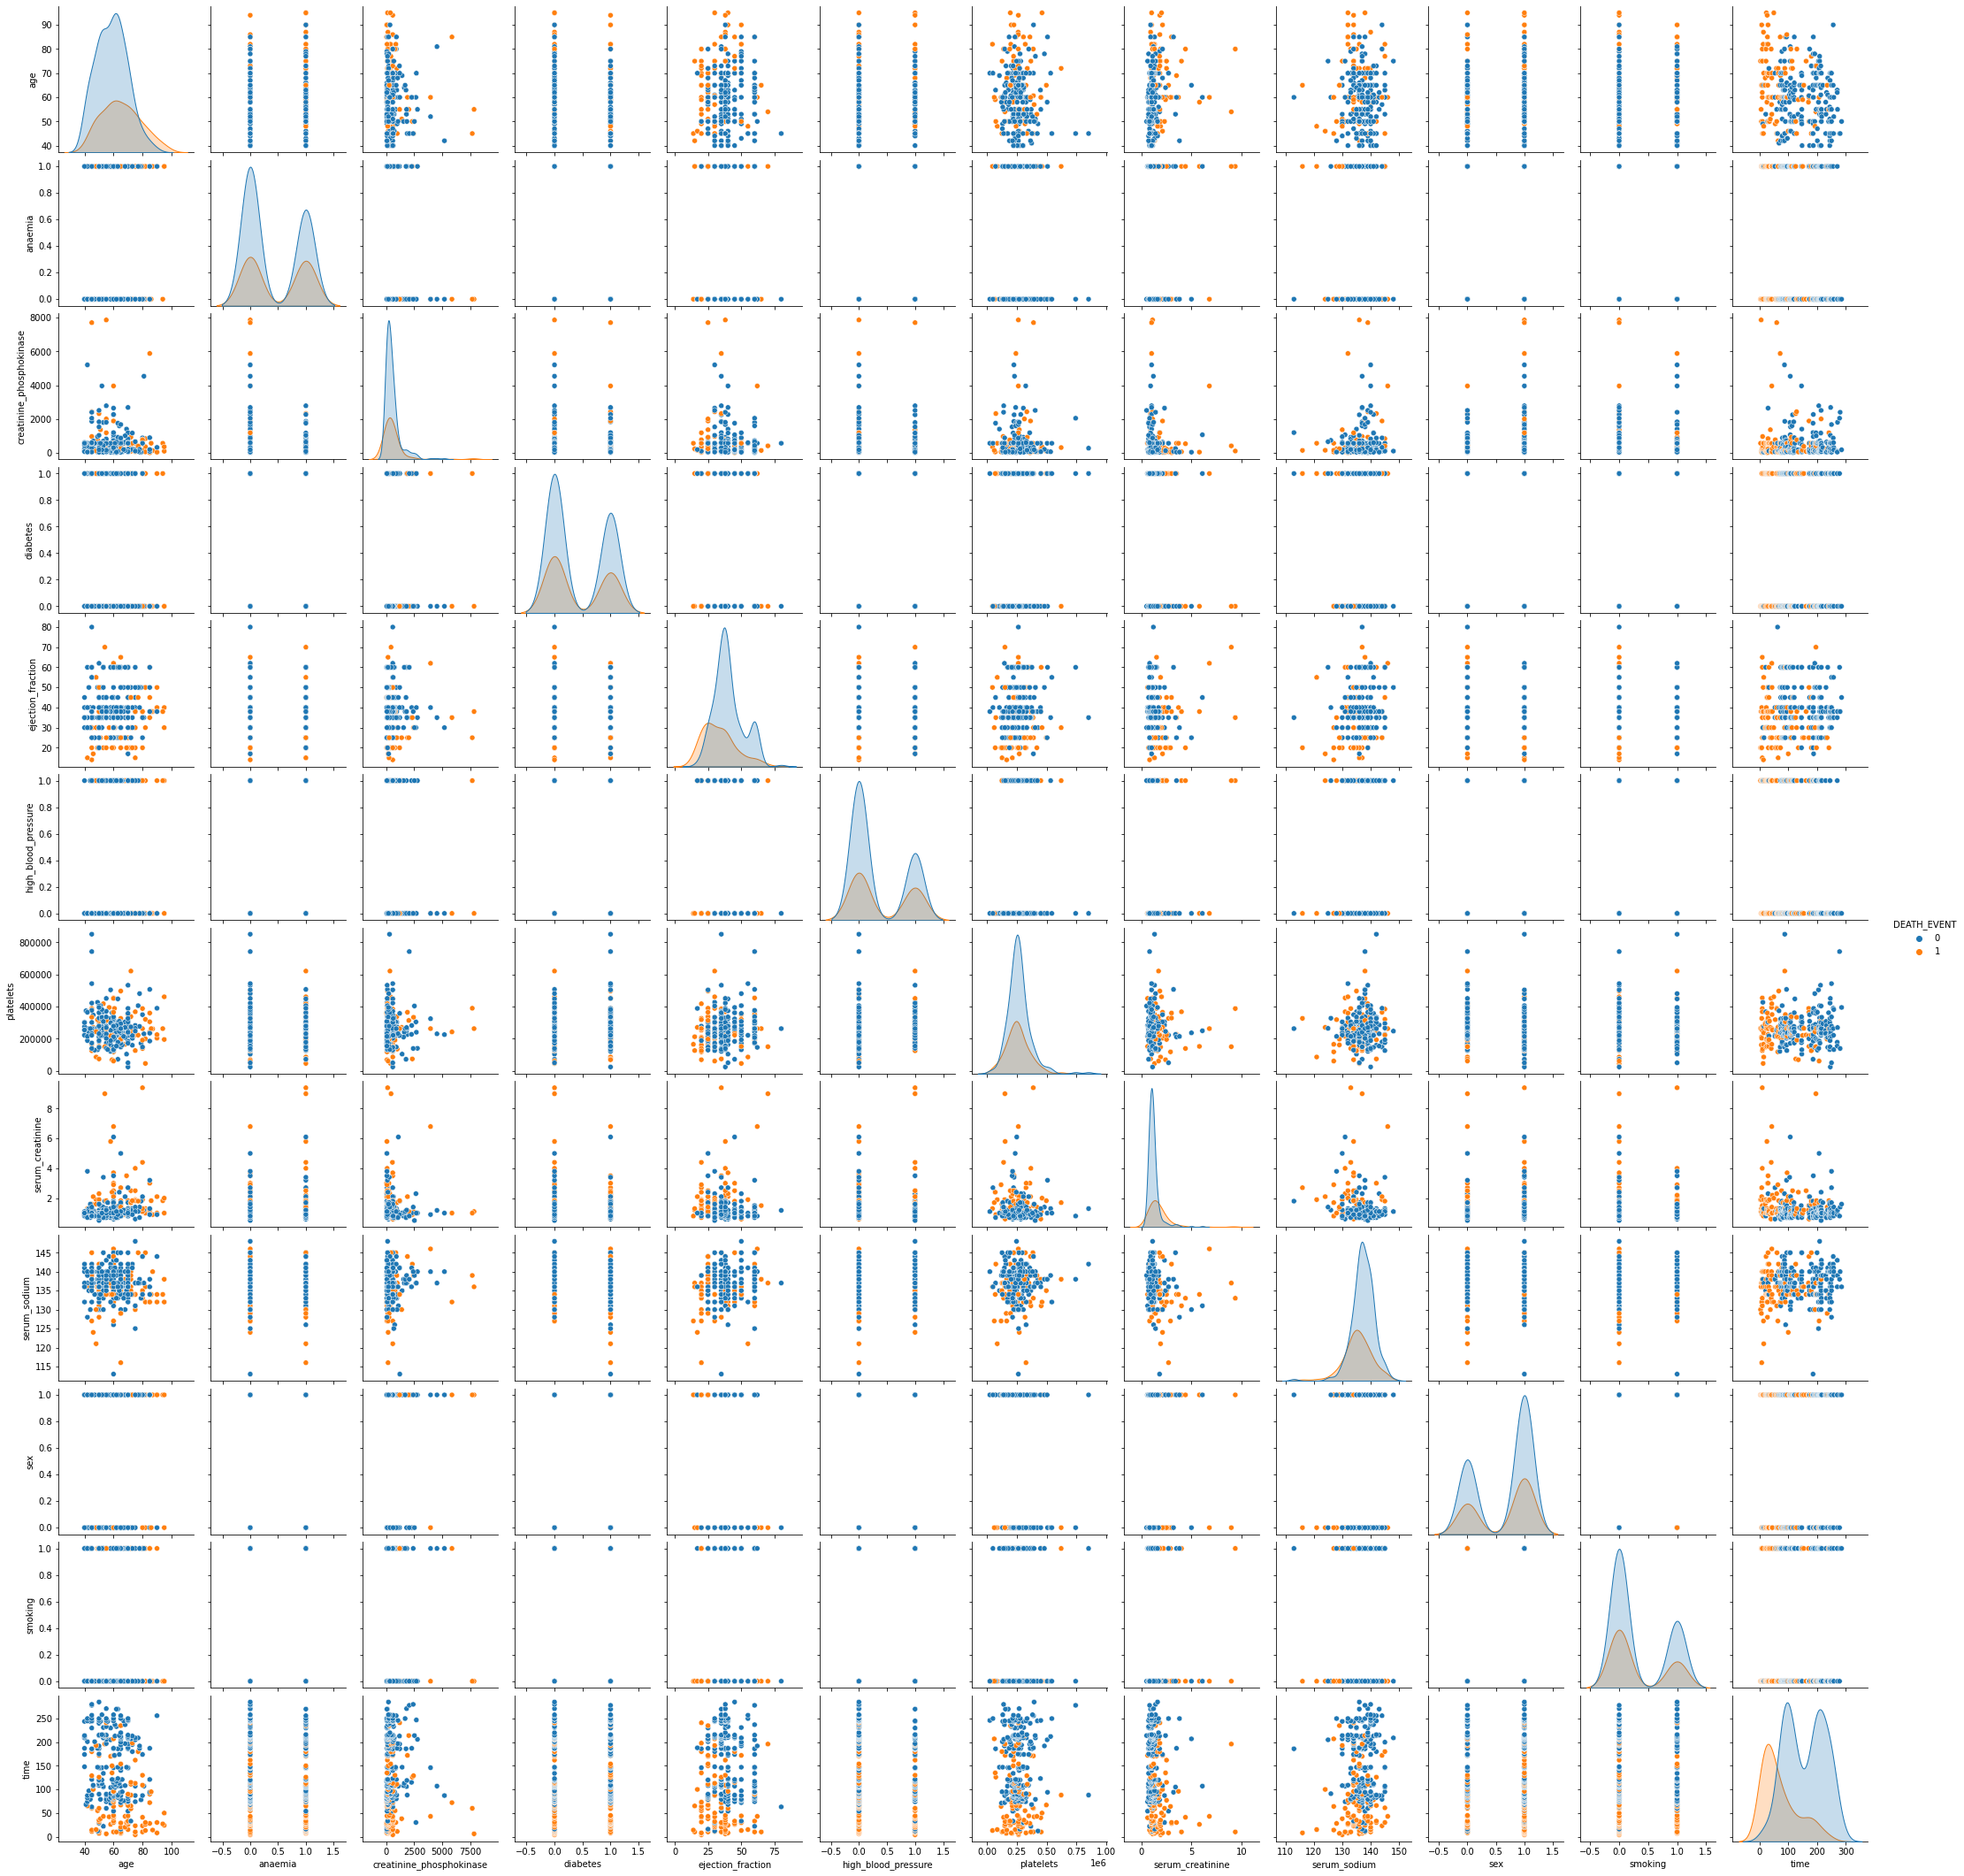

In [6]:
sns.pairplot(heart_df, hue='DEATH_EVENT')

In [3]:
# Using score Z outlier metric ( mean +/- 3 * standard deviation )
def remove_outliers(df, continuous_features=None, outliers_index=False):

    if continuous_features:
        features_list = continuous_features
    else:
        features_list = df.columns.to_list()
    boolean_mask = np.array([])
    print(df.shape)

    for feature in features_list:
        mean = df[feature].mean()
        std = df[feature].std()
        upper = mean + 3*std
        lower = mean - 3*std
        mask_f = (df[feature] < upper) & (df[feature] > lower)
        if feature == features_list[0]:
            boolean_mask = mask_f
        else:
            boolean_mask = np.vstack((boolean_mask,mask_f.values))

    no_outlier_idx = np.all(boolean_mask.T, axis=1)
    df_no_outlier = df[no_outlier_idx]
    print(df_no_outlier.shape)
    if outliers_index:
        return df_no_outlier, ~no_outlier_idx
    else:
        return df_no_outlier



In [4]:
columns_continuous = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
heart_df_no_outlier, outliers_ind = remove_outliers(heart_df, columns_continuous, outliers_index=True)

(299, 13)
(280, 13)


In [86]:
outliers = heart_df[outliers_ind]
outliers

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
19,48.0,1,582,1,55,0,87000.00,1.90,121,0,0,15,1
28,58.0,1,60,0,38,0,153000.00,5.80,134,1,0,26,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0


In [87]:
outliers.DEATH_EVENT.value_counts()

1    10
0     9
Name: DEATH_EVENT, dtype: int64

Não morreram: 69.29% dos casos
Morreram: 30.71% dos casos
Proporção: 2.26


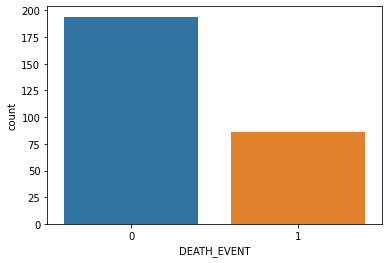

In [29]:
sns.countplot(data=heart_df_no_outlier, x='DEATH_EVENT')
valores = heart_df_no_outlier.DEATH_EVENT.value_counts().values
print('Não morreram: {:.2f}% dos casos'.format(valores[0]/(valores[1]+valores[0])*100))
print('Morreram: {:.2f}% dos casos'.format(valores[1]/(valores[1]+valores[0])*100))
print('Proporção: {:.2f}'.format(valores[0]/valores[1]))

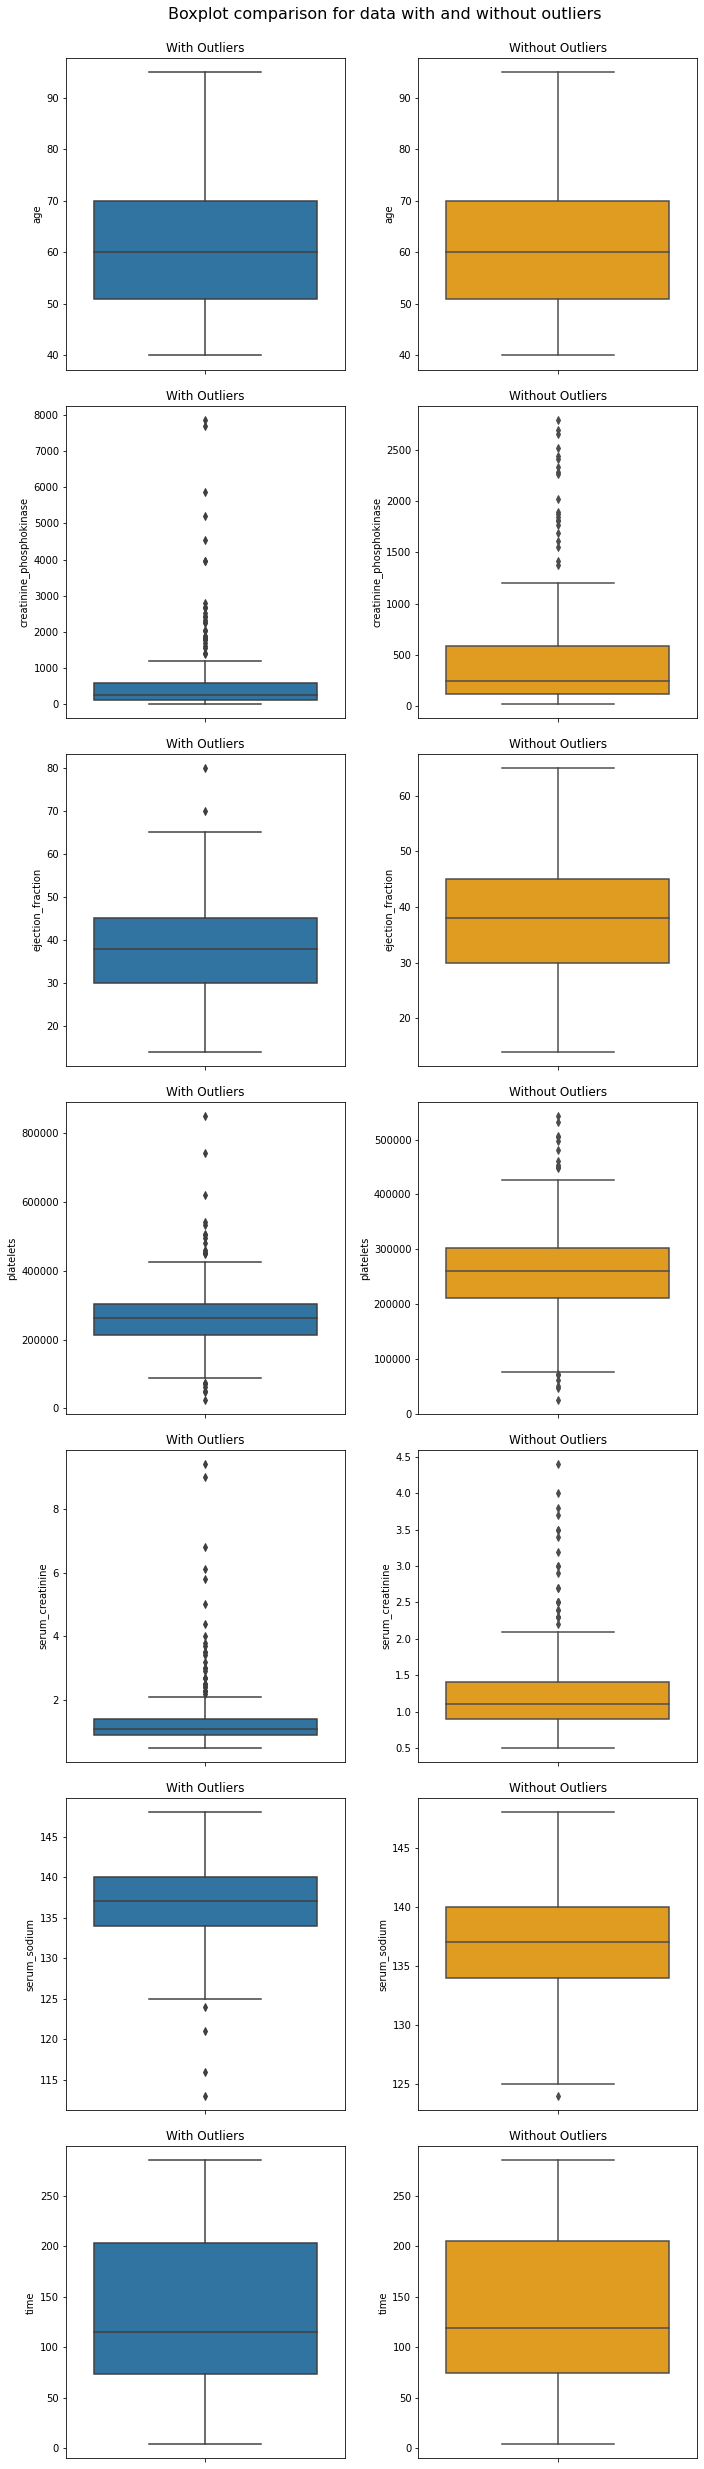

In [6]:
fig = plt.figure(figsize=(10,35))
fig.suptitle('Boxplot comparison for data with and without outliers', fontsize=16, x = 0.545)#, dpi=300)
count = 1
for column in columns_continuous:
    #plt.subplot(7,2,count)
    ax = fig.add_subplot(7,2,count)
    ax.set_title('With Outliers')
    sns.boxplot(data=heart_df, y = column, ax = ax)
    count+=1
    #plt.subplot(7,2,count)
    ax = fig.add_subplot(7,2,count)
    ax.set_title('Without Outliers')
    sns.boxplot(data=heart_df_no_outlier, y = column, color='orange', ax = ax)
    count+=1
fig.tight_layout(pad = 1.5)
fig.subplots_adjust(top=.96)
plt.show()

In [8]:
X = heart_df.drop(['DEATH_EVENT','time'], axis=1)
y = heart_df['DEATH_EVENT']
X_t = heart_df.drop('DEATH_EVENT', axis=1)
X_wout = heart_df_no_outlier.drop(['DEATH_EVENT','time'], axis=1)
X_wout_t = heart_df_no_outlier.drop('DEATH_EVENT', axis=1)
y_wout = heart_df_no_outlier['DEATH_EVENT']

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5, stratify=y)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t,y,test_size=.3,random_state=5,stratify=y)
X_train_wo,X_test_wo,y_train_wo,y_test_wo = train_test_split(X_wout,y_wout,test_size=.2,random_state=5,stratify=y_wout)
X_train_wot,X_test_wot,y_train_wot,y_test_wot = train_test_split(X_wout_t,y_wout,test_size=.2,random_state=5,stratify=y_wout)
smote = SMOTE(random_state=5)

X_train_res, y_train_res = smote.fit_resample(X_train,y_train)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=5,class_weight='balanced_subsample')
clf_rf.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

In [11]:
from sklearn.metrics import classification_report
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        61
           1       0.59      0.69      0.63        29

    accuracy                           0.74        90
   macro avg       0.71      0.73      0.72        90
weighted avg       0.76      0.74      0.75        90



In [19]:
X_train_t_res, y_train_t_res = smote.fit_resample(X_train_t,y_train_t)
clf_rf.fit(X_train_t,y_train_t)
y_pred = clf_rf.predict(X_test_t)
print(classification_report(y_test_t,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        61
           1       0.76      0.76      0.76        29

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



In [16]:
clf_rf.fit(X_train_wo,y_train_wo)
y_pred = clf_rf.predict(X_test_wo)
print(classification_report(y_test_wo,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        39
           1       0.60      0.35      0.44        17

    accuracy                           0.73        56
   macro avg       0.68      0.63      0.63        56
weighted avg       0.71      0.73      0.71        56



In [17]:
clf_rf.fit(X_train_wot,y_train_wot)
y_pred = clf_rf.predict(X_test_wot)
print(classification_report(y_test_wot,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.69      0.65      0.67        17

    accuracy                           0.80        56
   macro avg       0.77      0.76      0.76        56
weighted avg       0.80      0.80      0.80        56



In [20]:
import joblib as job
job.dump([X_train_res,X_test,y_train_res,y_test], 'train_test_for_rf.pkl')

In [21]:
job.dump([X_t,y],'X_y_for_rf.pkl')

['X_y_for_rf.pkl']

In [32]:
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
def objective_rf(trial):

    X,y = job.load('X_y_for_rf.pkl')
    #train_x, test_x, train_y, test_y = job.load('train_test_for_rf.pkl')

    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 500)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 50, log=True)
    # Number of features to consider at every split
    rf_max_features = trial.suggest_categorical("rf_max_features", ['auto', 'sqrt'])
    # Minimum number of samples required to split a node
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 30, log=True)
    # Minimum number of samples required at each leaf node
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 5)
    rf_oob_score = trial.suggest_int("rf_oob_score", 0, 1)
    # Method of selecting samples for training each tree
    #rf_bootstrap = trial.suggest_int("rf_bootstrap", 0, 1)
    classifier_obj = RandomForestClassifier(
        max_depth=rf_max_depth, n_estimators=rf_n_estimators, max_features=rf_max_features,
        min_samples_split=rf_min_samples_split, min_samples_leaf=rf_min_samples_leaf,
        oob_score=rf_oob_score, random_state=5, class_weight='balanced_subsample'
    )

    for step in range(100):
        #classifier_obj.fit(train_x, train_y)

        # Report intermediate objective value.
        #pred_y = classifier_obj.predict(test_x)
        intermediate_value = np.mean(cross_val_score(classifier_obj,X,y,cv=5,scoring='f1'))#f1_score(test_y, pred_y)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

In [15]:
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=1000, timeout=600)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study_rf.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study_rf.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study_rf.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))
print("Best trial:")
trial_rf = study_rf.best_trial

print("  Value: {}".format(trial_rf.value))
print("  Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

[I 2021-10-02 21:24:21,395] A new study created in memory with name: no-name-e17aae85-c6f6-4bb8-ab3c-c442ef3c2e09
[I 2021-10-02 21:24:23,640] Trial 0 finished with value: 0.6349206349206349 and parameters: {'rf_n_estimators': 1340, 'rf_max_depth': 5, 'rf_max_features': 'sqrt', 'rf_min_samples_split': 7, 'rf_min_samples_leaf': 2, 'rf_oob_score': 0}. Best is trial 0 with value: 0.6349206349206349.
/home/gabrielblins/Documentos/LAIS - UFRN/heart-failure-LAIS/laisML/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[I 2021-10-02 21:24:26,699] Trial 1 finished with value: 0.6349206349206349 and parameters: {'rf_n_estimators': 1730, 'rf_max_depth': 7, 'rf_max_features': 'sqrt', 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 3, 'rf_oob_score': 1}. Best is trial 0 with value: 0.6349206349206349.
[I 2021-10-02 21:24:27,659] Trial 2 finished with value: 0.65625 and parame

  Number of finished trials:  301
  Number of pruned trials:  63
  Number of complete trials:  238
Best trial:
  Value: 0.6875
  Params: 
    rf_n_estimators: 210
    rf_max_depth: 77
    rf_max_features: sqrt
    rf_min_samples_split: 26
    rf_min_samples_leaf: 2
    rf_oob_score: 1


In [33]:
study_rf_t = optuna.create_study(direction="maximize")
study_rf_t.optimize(objective_rf, n_trials=500, timeout=600)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study_rf_t.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study_rf_t.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study_rf_t.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))
print("Best trial:")
trial_rf = study_rf_t.best_trial

print("  Value: {}".format(trial_rf.value))
print("  Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

[I 2021-10-04 00:45:19,866] A new study created in memory with name: no-name-e5c73d3d-7ad5-4689-bef6-af094a97f5cd
[I 2021-10-04 00:45:24,397] Trial 0 finished with value: 0.5699411286296566 and parameters: {'rf_n_estimators': 444, 'rf_max_depth': 5, 'rf_max_features': 'sqrt', 'rf_min_samples_split': 22, 'rf_min_samples_leaf': 3, 'rf_oob_score': 1}. Best is trial 0 with value: 0.5699411286296566.
[I 2021-10-04 00:45:28,141] Trial 1 finished with value: 0.5133583758916135 and parameters: {'rf_n_estimators': 417, 'rf_max_depth': 6, 'rf_max_features': 'auto', 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 1, 'rf_oob_score': 1}. Best is trial 0 with value: 0.5699411286296566.
[I 2021-10-04 00:45:30,725] Trial 2 finished with value: 0.5218148820326679 and parameters: {'rf_n_estimators': 282, 'rf_max_depth': 4, 'rf_max_features': 'sqrt', 'rf_min_samples_split': 8, 'rf_min_samples_leaf': 3, 'rf_oob_score': 1}. Best is trial 0 with value: 0.5699411286296566.
[I 2021-10-04 00:45:32,932] Trial

  Number of finished trials:  313
  Number of pruned trials:  156
  Number of complete trials:  157
Best trial:
  Value: 0.6198682476943347
  Params: 
    rf_n_estimators: 130
    rf_max_depth: 2
    rf_max_features: sqrt
    rf_min_samples_split: 20
    rf_min_samples_leaf: 1
    rf_oob_score: 1


In [17]:
clf_rf_best = RandomForestClassifier(n_estimators=210, max_depth=77, max_features='sqrt', min_samples_split=26,
                                     min_samples_leaf=2, oob_score=True, random_state=5)
clf_rf_best.fit(X_train_res,y_train_res)

/home/gabrielblins/Documentos/LAIS - UFRN/heart-failure-LAIS/laisML/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_depth=77, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=26, n_estimators=210, oob_score=True,
                       random_state=5)

In [18]:
y_pred_b = clf_rf_best.predict(X_test)
print(classification_report(y_test,y_pred_b))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.63      0.76      0.69        29

    accuracy                           0.78        90
   macro avg       0.75      0.77      0.76        90
weighted avg       0.79      0.78      0.78        90



In [23]:
features = X_train_res.columns.to_list()
features_val = clf_rf_best.feature_importances_

features_importances = {}

for key,value in zip(features,features_val):
    features_importances[key] = value
    print(f'{key}:',value)

age: 0.15733986281795806
anaemia: 0.0053576720992837504
creatinine_phosphokinase: 0.10789613115070544
diabetes: 0.011243551928558373
ejection_fraction: 0.30230499343073064
high_blood_pressure: 0.006308927687241957
platelets: 0.0605592381279349
serum_creatinine: 0.19682243156462195
serum_sodium: 0.11538065574894302
sex: 0.010650618366425758
smoking: 0.026135917077596233


In [24]:
best_features = [feature for feature in features_importances.keys() if features_importances[feature] > 0.1]
best_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'serum_creatinine',
 'serum_sodium']

In [26]:
X_bf = heart_df[best_features]

In [27]:
X_train_bf, X_test_bf, y_train_bf, y_test_bf = train_test_split(X_bf, y, test_size=.3, random_state=5, stratify=y)

In [29]:
smote_bf = SMOTE()
X_train_bf_res, y_train_bf_res = smote_bf.fit_resample(X_train_bf,y_train_bf)

In [30]:
clf_rf_bf = RandomForestClassifier(n_estimators=210, max_depth=77, max_features='sqrt', min_samples_split=26,
                                     min_samples_leaf=2, oob_score=True, random_state=5)
clf_rf_bf.fit(X_train_bf_res,y_train_bf_res)

/home/gabrielblins/Documentos/LAIS - UFRN/heart-failure-LAIS/laisML/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_depth=77, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=26, n_estimators=210, oob_score=True,
                       random_state=5)

In [32]:
y_pred_bf = clf_rf_bf.predict(X_test_bf)
print(classification_report(y_test_bf,y_pred_bf))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        61
           1       0.58      0.72      0.65        29

    accuracy                           0.74        90
   macro avg       0.72      0.74      0.72        90
weighted avg       0.77      0.74      0.75        90



In [35]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=77, max_features='sqrt', min_samples_split=26,
                                  min_samples_leaf=2, random_state=5)

clf_tree.fit(X_train_res,y_train_res)


DecisionTreeClassifier(max_depth=77, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=26, random_state=5)

In [36]:
y_pred_tree = clf_tree.predict(X_test)
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        61
           1       0.48      0.41      0.44        29

    accuracy                           0.67        90
   macro avg       0.61      0.60      0.60        90
weighted avg       0.66      0.67      0.66        90



In [12]:
clf_rf_w = RandomForestClassifier(n_estimators=210, max_depth=77, max_features='sqrt', min_samples_split=26,
                                     min_samples_leaf=2, oob_score=True, random_state=5, class_weight='balanced_subsample')
clf_rf_w.fit(X_train,y_train)

/home/gabrielblins/Documentos/LAIS - UFRN/heart-failure-LAIS/laisML/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(class_weight='balanced_subsample', max_depth=77,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=26, n_estimators=210, oob_score=True,
                       random_state=5)

In [11]:
y_pred_w = clf_rf_w.predict(X_test)
print(classification_report(y_test,y_pred_w))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        61
           1       0.59      0.76      0.67        29

    accuracy                           0.76        90
   macro avg       0.73      0.76      0.74        90
weighted avg       0.78      0.76      0.76        90



In [14]:
clf_rf_w.fit(X_train_res,y_train_res)
y_pred_wr = clf_rf_w.predict(X_test)
print(classification_report(y_test,y_pred_wr))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.63      0.76      0.69        29

    accuracy                           0.78        90
   macro avg       0.75      0.77      0.76        90
weighted avg       0.79      0.78      0.78        90



/home/gabrielblins/Documentos/LAIS - UFRN/heart-failure-LAIS/laisML/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
